In [1]:
import pandas as pd
from utils import make_plot, rmse

In [2]:
log_file_path = 'mpc_helix_spin_mihir_psi.log' #'vertcirc_1_OG.log' #helix_spin_0.log #helix_spin_1_OG.log #helix_spin_jax.log #vertcirc_1_NEW.log
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,mpc_time,metadata
0,9.536743e-07,-0.004853,-0.009409,0.058603,-0.005244,-0.839809,0.067026,-0.8,0.005130,0.600000,2.765590e-07,-0.700000,3.994742e-07,0.003700,Sim
1,9.913206e-03,-0.004817,-0.009268,0.058612,-0.005253,-0.840086,0.071806,-0.8,0.024510,0.599993,2.874751e-03,-0.701437,4.152434e-03,0.002634,Horizon:3.0
2,2.003813e-02,-0.004785,-0.009132,0.058633,-0.005285,-0.840350,0.076561,-0.8,0.044429,0.599972,5.810829e-03,-0.702905,8.393551e-03,0.002521,Num Steps:20
3,3.003931e-02,-0.004729,-0.008875,0.058702,-0.005347,-0.840621,0.080371,-0.8,0.064478,0.599937,8.710889e-03,-0.704355,1.258284e-02,0.002618,No Pyjoules
4,3.993988e-02,-0.004704,-0.008753,0.058751,-0.005355,-0.840863,0.085086,-0.8,0.083809,0.599888,1.158157e-02,-0.705791,1.672998e-02,0.002537,0


In [3]:
actual_values = df_log[['x', 'y', 'z', 'yaw']].to_numpy()
reference_values = df_log[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()

In [4]:
# actual_values[:,3] = actual_values[:,3] * .18
# reference_values[:,3] = reference_values[:,3] * .18

In [5]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"{df_log['metadata'][1]}")
print(f"{df_log['metadata'][2]}")
print(f"{df_log['metadata'][3]}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Horizon:3.0
Num Steps:20
No Pyjoules
RMSE: 0.31133178036923165


# Plot it!

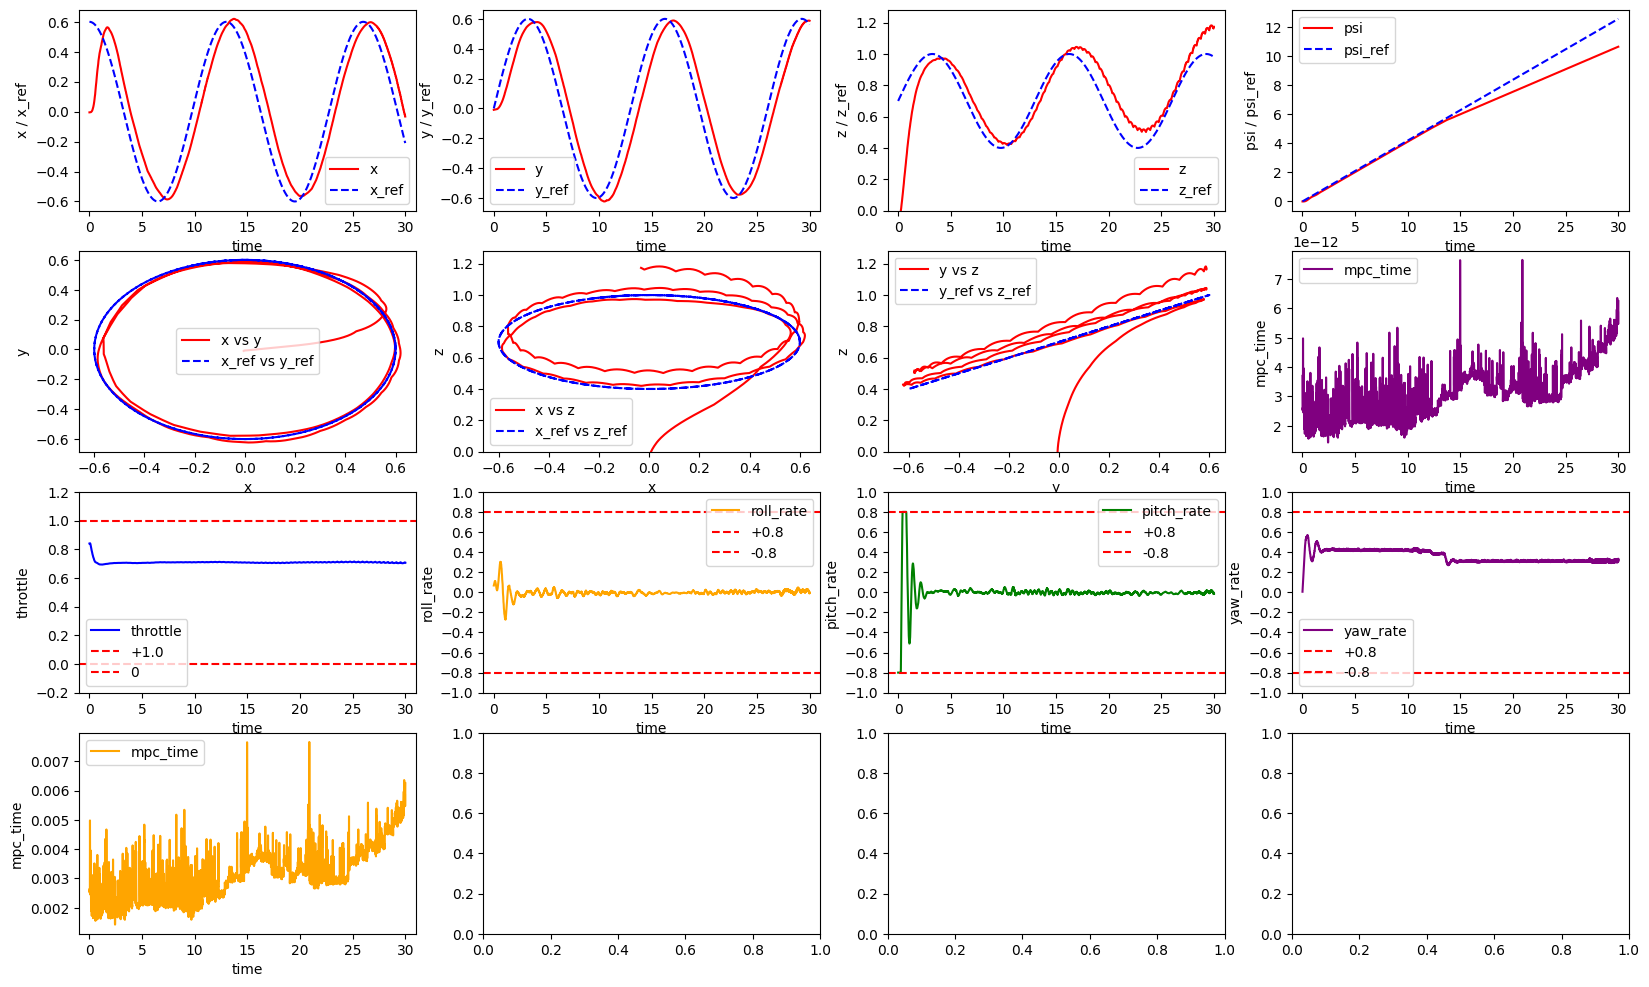

In [6]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)